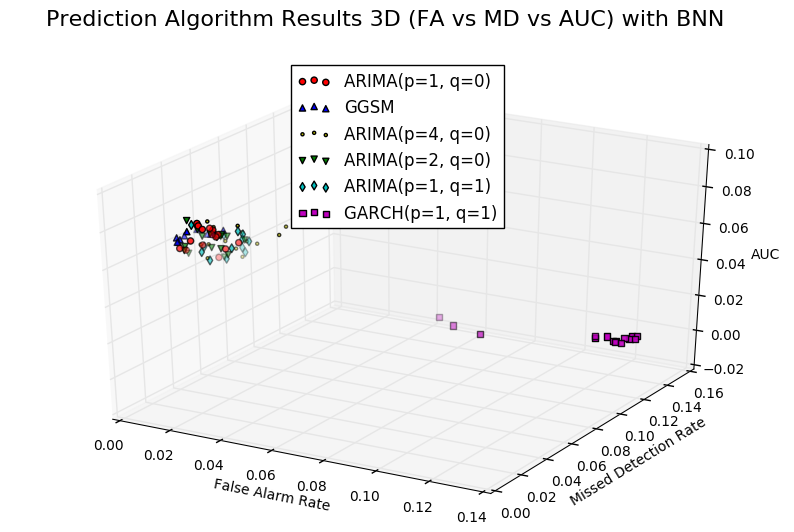

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

r = [
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0832201398004, Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=3.075, FA=0.0177304964539, MD=0.0195035460993',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0822153882157, Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=3.125, FA=0.0211827007944, MD=0.0203000882613',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0821640907719, Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=3.075, FA=0.0228070175439, MD=0.0245614035088',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0813488429671, Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=3.125, FA=0.0194690265487, MD=0.0194690265487',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0809070661193, Past Prediction Horizon=64, Future Prediction Horizon=18, Threshold=3.375, FA=0.0214861235452, MD=0.0205908683975',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0803013759745, Past Prediction Horizon=48, Future Prediction Horizon=12, Threshold=3.225, FA=0.0318142734308, MD=0.0292347377472',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0791990366166, Past Prediction Horizon=48, Future Prediction Horizon=12, Threshold=3.175, FA=0.0227670753065, MD=0.0210157618214',
 'Model=GGSM, ROC AUC=0.0791855549835, Past Prediction Horizon=80, Future Prediction Horizon=18, Threshold=3.075, FA=0.0190389845875, MD=0.0253853127833',
 'Model=GGSM, ROC AUC=0.0787785613354, Past Prediction Horizon=32, Future Prediction Horizon=18, Threshold=2.875, FA=0.0192475940507, MD=0.0166229221347',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0787177919469, Past Prediction Horizon=64, Future Prediction Horizon=18, Threshold=3.425, FA=0.0239574090506, MD=0.0266193433895',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0785046728972, Past Prediction Horizon=64, Future Prediction Horizon=18, Threshold=3.375, FA=0.0205908683975, MD=0.0214861235452',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0782902559609, Past Prediction Horizon=32, Future Prediction Horizon=18, Threshold=2.975, FA=0.0250215703192, MD=0.0241587575496',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0782025193129, Past Prediction Horizon=64, Future Prediction Horizon=12, Threshold=3.425, FA=0.0229885057471, MD=0.025641025641',
 'Model=GGSM, ROC AUC=0.0779070652396, Past Prediction Horizon=96, Future Prediction Horizon=18, Threshold=3.075, FA=0.0193192272309, MD=0.0257589696412',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0778838837817, Past Prediction Horizon=32, Future Prediction Horizon=18, Threshold=3.225, FA=0.043153526971, MD=0.0423236514523',
 'Model=GGSM, ROC AUC=0.0776766642933, Past Prediction Horizon=80, Future Prediction Horizon=12, Threshold=3.275, FA=0.0242152466368, MD=0.0251121076233',
 'Model=GGSM, ROC AUC=0.0775256910686, Past Prediction Horizon=32, Future Prediction Horizon=12, Threshold=3.125, FA=0.0273037542662, MD=0.0273037542662',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0773884997786, Past Prediction Horizon=48, Future Prediction Horizon=12, Threshold=3.175, FA=0.0253054101222, MD=0.021815008726',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0771250753456, Past Prediction Horizon=32, Future Prediction Horizon=18, Threshold=3.075, FA=0.0315161839864, MD=0.0298126064736',
 'Model=GGSM, ROC AUC=0.0770608786794, Past Prediction Horizon=64, Future Prediction Horizon=18, Threshold=3.075, FA=0.0187667560322, MD=0.0250223413762',
 'Model=GGSM, ROC AUC=0.0768829977378, Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=3.075, FA=0.0185022026432, MD=0.0246696035242',
 'Model=GGSM, ROC AUC=0.0766467021917, Past Prediction Horizon=96, Future Prediction Horizon=12, Threshold=3.275, FA=0.024567788899, MD=0.0254777070064',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0762681305264, Past Prediction Horizon=48, Future Prediction Horizon=12, Threshold=3.225, FA=0.0261096605744, MD=0.023498694517',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0758948422436, Past Prediction Horizon=32, Future Prediction Horizon=18, Threshold=2.975, FA=0.0274914089347, MD=0.0257731958763',
 'Model=GGSM, ROC AUC=0.0755923425602, Past Prediction Horizon=64, Future Prediction Horizon=12, Threshold=3.275, FA=0.0238726790451, MD=0.0247568523431',
 'Model=GGSM, ROC AUC=0.0755507077008, Past Prediction Horizon=80, Future Prediction Horizon=6, Threshold=3.375, FA=0.0163636363636, MD=0.0145454545455',
 'Model=GGSM, ROC AUC=0.0755397277671, Past Prediction Horizon=32, Future Prediction Horizon=6, Threshold=3.375, FA=0.017316017316, MD=0.0181818181818',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0755275569919, Past Prediction Horizon=64, Future Prediction Horizon=18, Threshold=3.425, FA=0.0266193433895, MD=0.0239574090506',
 'Model=GGSM, ROC AUC=0.0754655905755, Past Prediction Horizon=48, Future Prediction Horizon=12, Threshold=3.275, FA=0.022687609075, MD=0.0244328097731',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0752371984517, Past Prediction Horizon=32, Future Prediction Horizon=12, Threshold=3.225, FA=0.043153526971, MD=0.0373443983402',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0751801795931, Past Prediction Horizon=32, Future Prediction Horizon=12, Threshold=3.125, FA=0.0256629597947, MD=0.0265183917879',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.074867390426, Past Prediction Horizon=32, Future Prediction Horizon=12, Threshold=3.175, FA=0.0320945945946, MD=0.0320945945946',
 'Model=GGSM, ROC AUC=0.0747365079365, Past Prediction Horizon=96, Future Prediction Horizon=6, Threshold=3.375, FA=0.0175115207373, MD=0.0147465437788',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0746457000318, Past Prediction Horizon=64, Future Prediction Horizon=12, Threshold=3.475, FA=0.0304083405734, MD=0.0347523892268',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0745767266864, Past Prediction Horizon=48, Future Prediction Horizon=6, Threshold=3.325, FA=0.0267471958585, MD=0.0258843830889',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0740054289783, Past Prediction Horizon=80, Future Prediction Horizon=12, Threshold=3.525, FA=0.0250671441361, MD=0.0259623992838',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0737805558656, Past Prediction Horizon=80, Future Prediction Horizon=18, Threshold=3.525, FA=0.0200913242009, MD=0.0173515981735',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0737068310278, Past Prediction Horizon=64, Future Prediction Horizon=12, Threshold=3.425, FA=0.0204081632653, MD=0.0248447204969',
 'Model=GGSM, ROC AUC=0.0735186089975, Past Prediction Horizon=64, Future Prediction Horizon=6, Threshold=3.375, FA=0.0170098478066, MD=0.0143240823635',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0735042324284, Past Prediction Horizon=32, Future Prediction Horizon=12, Threshold=3.125, FA=0.0272340425532, MD=0.0297872340426',
 'Model=GGSM, ROC AUC=0.0734536381764, Past Prediction Horizon=48, Future Prediction Horizon=6, Threshold=3.375, FA=0.0167696381289, MD=0.0141218005296',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0732255367434, Past Prediction Horizon=48, Future Prediction Horizon=6, Threshold=3.375, FA=0.0216076058773, MD=0.0293863439931',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0729124156854, Past Prediction Horizon=48, Future Prediction Horizon=6, Threshold=3.375, FA=0.0249140893471, MD=0.0317869415808',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0721800027206, Past Prediction Horizon=48, Future Prediction Horizon=6, Threshold=3.375, FA=0.0240963855422, MD=0.0309810671256',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0717962714722, Past Prediction Horizon=64, Future Prediction Horizon=12, Threshold=3.475, FA=0.0313043478261, MD=0.0330434782609',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0711340914238, Past Prediction Horizon=96, Future Prediction Horizon=18, Threshold=3.625, FA=0.0316455696203, MD=0.0298372513562',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0709628528258, Past Prediction Horizon=96, Future Prediction Horizon=18, Threshold=3.675, FA=0.031503150315, MD=0.034203420342',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0709625311499, Past Prediction Horizon=80, Future Prediction Horizon=12, Threshold=3.575, FA=0.026714158504, MD=0.0293855743544',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0706961642464, Past Prediction Horizon=80, Future Prediction Horizon=18, Threshold=3.525, FA=0.018315018315, MD=0.0164835164835',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0706588927128, Past Prediction Horizon=96, Future Prediction Horizon=18, Threshold=3.675, FA=0.0332434860737, MD=0.0341419586703',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0704352151945, Past Prediction Horizon=96, Future Prediction Horizon=18, Threshold=3.725, FA=0.0323741007194, MD=0.0341726618705',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0701421169557, Past Prediction Horizon=80, Future Prediction Horizon=18, Threshold=3.575, FA=0.0208711433757, MD=0.0226860254083',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0700446902942, Past Prediction Horizon=64, Future Prediction Horizon=6, Threshold=3.475, FA=0.0228873239437, MD=0.0246478873239',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0698455111862, Past Prediction Horizon=32, Future Prediction Horizon=6, Threshold=3.275, FA=0.0214408233276, MD=0.0231560891938',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0698337097386, Past Prediction Horizon=64, Future Prediction Horizon=6, Threshold=3.425, FA=0.0169946332737, MD=0.0152057245081',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.069688379334, Past Prediction Horizon=32, Future Prediction Horizon=6, Threshold=3.325, FA=0.0358632193495, MD=0.0350291909925',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0696662197138, Past Prediction Horizon=32, Future Prediction Horizon=6, Threshold=3.275, FA=0.0313293818798, MD=0.0254022015241',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0692286679409, Past Prediction Horizon=32, Future Prediction Horizon=6, Threshold=3.225, FA=0.028085106383, MD=0.023829787234',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0691503719066, Past Prediction Horizon=64, Future Prediction Horizon=6, Threshold=3.425, FA=0.01875, MD=0.0151785714286',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0689075501658, Past Prediction Horizon=80, Future Prediction Horizon=18, Threshold=3.575, FA=0.0217391304348, MD=0.0235507246377',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0687577068745, Past Prediction Horizon=96, Future Prediction Horizon=12, Threshold=3.575, FA=0.0289855072464, MD=0.0253623188406',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0687571199715, Past Prediction Horizon=80, Future Prediction Horizon=12, Threshold=3.525, FA=0.024236983842, MD=0.024236983842',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0677807066397, Past Prediction Horizon=64, Future Prediction Horizon=6, Threshold=3.475, FA=0.0230088495575, MD=0.0194690265487',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0677622355808, Past Prediction Horizon=96, Future Prediction Horizon=12, Threshold=3.625, FA=0.030603060306, MD=0.029702970297',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0670158419366, Past Prediction Horizon=80, Future Prediction Horizon=12, Threshold=3.575, FA=0.0308914386584, MD=0.0335392762577',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0667198483574, Past Prediction Horizon=80, Future Prediction Horizon=6, Threshold=3.525, FA=0.0162601626016, MD=0.0207768744354',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0659020346149, Past Prediction Horizon=96, Future Prediction Horizon=12, Threshold=3.575, FA=0.0298642533937, MD=0.0253393665158',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0652638785733, Past Prediction Horizon=80, Future Prediction Horizon=6, Threshold=3.525, FA=0.0171480144404, MD=0.0207581227437',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0649395927834, Past Prediction Horizon=96, Future Prediction Horizon=12, Threshold=3.625, FA=0.0322291853178, MD=0.0331244404655',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0649171562433, Past Prediction Horizon=80, Future Prediction Horizon=6, Threshold=3.525, FA=0.0250896057348, MD=0.0197132616487',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.0639764299216, Past Prediction Horizon=80, Future Prediction Horizon=6, Threshold=3.525, FA=0.0259623992838, MD=0.0196956132498',
 'Model=ARIMA(p=1, q=1), ROC AUC=0.063198185941, Past Prediction Horizon=96, Future Prediction Horizon=6, Threshold=3.575, FA=0.028802880288, MD=0.026102610261',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0631637188209, Past Prediction Horizon=96, Future Prediction Horizon=6, Threshold=3.625, FA=0.0321141837645, MD=0.0312221231044',
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0630390022676, Past Prediction Horizon=96, Future Prediction Horizon=6, Threshold=3.575, FA=0.02700270027, MD=0.027902790279',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.062714739229, Past Prediction Horizon=96, Future Prediction Horizon=6, Threshold=3.575, FA=0.0252707581227, MD=0.0270758122744',
 'Model=GARCH(p=1, q=1), ROC AUC=0.006938794668, Past Prediction Horizon=32, Future Prediction Horizon=18, Threshold=1.475, FA=0.132441471572, MD=0.130434782609',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00652336469914, Past Prediction Horizon=32, Future Prediction Horizon=12, Threshold=1.875, FA=0.125084516565, MD=0.125760649087',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00589042994498, Past Prediction Horizon=32, Future Prediction Horizon=6, Threshold=2.675, FA=0.122033898305, MD=0.122711864407',
 'Model=GARCH(p=1, q=1), ROC AUC=0.0054480740676, Past Prediction Horizon=64, Future Prediction Horizon=18, Threshold=1.575, FA=0.132876712329, MD=0.134246575342',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00543286563631, Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=1.325, FA=0.13188307274, MD=0.12984364378',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00439342403628, Past Prediction Horizon=48, Future Prediction Horizon=12, Threshold=1.675, FA=0.129316181449, MD=0.13134732566',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00426550559003, Past Prediction Horizon=64, Future Prediction Horizon=12, Threshold=1.825, FA=0.132423208191, MD=0.133105802048',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00419878730705, Past Prediction Horizon=80, Future Prediction Horizon=18, Threshold=1.025, FA=0.119115549215, MD=0.12910128388',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00388990060851, Past Prediction Horizon=64, Future Prediction Horizon=6, Threshold=2.525, FA=0.126896551724, MD=0.126896551724',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00372510376542, Past Prediction Horizon=48, Future Prediction Horizon=6, Threshold=2.275, FA=0.127457627119, MD=0.12813559322',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00269535421858, Past Prediction Horizon=80, Future Prediction Horizon=12, Threshold=1.325, FA=0.127106741573, MD=0.128511235955',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00189817275572, Past Prediction Horizon=80, Future Prediction Horizon=6, Threshold=1.825, FA=0.128650904033, MD=0.130041724618',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00131654174138, Past Prediction Horizon=96, Future Prediction Horizon=18, Threshold=1.025, FA=0.0597014925373, MD=0.124901806756',
 'Model=GARCH(p=1, q=1), ROC AUC=0.0011688759707, Past Prediction Horizon=96, Future Prediction Horizon=12, Threshold=1.025, FA=0.0685358255452, MD=0.118380062305',
 'Model=GARCH(p=1, q=1), ROC AUC=0.00112426303855, Past Prediction Horizon=96, Future Prediction Horizon=6, Threshold=1.025, FA=0.0812260536398, MD=0.114176245211',
]
algorithm_results = dict()

for line in r:           
    toks = line.split(', ')

    if len(toks) == 7:
        algorithm = toks[0].replace('Model=', '')
    else:
        algorithm = toks[0].replace('Model=', '') + ', ' + toks[1]
        
    if algorithm not in algorithm_results:
        algorithm_results[algorithm] = []
        
    if len(toks) == 7:
        algorithm_results[algorithm].append([float(toks[1].split('=')[1])] + map(lambda t: float(t.split('=')[1]), toks[5:]))
    else:
        algorithm_results[algorithm].append([float(toks[2].split('=')[1])] + map(lambda t: float(t.split('=')[1]), toks[6:]))

fig = plt.figure(figsize=(10, 6))
fig.suptitle('Prediction Algorithm Results 3D (FA vs MD vs AUC) with BNN', fontsize=16)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('False Alarm Rate')
ax.set_ylabel('Missed Detection Rate')
ax.set_zlabel('AUC')

colors_and_markers = [('r', 'o'), ('b', '^'), ('y', '.'), ('g', 'v'),
                      ('c', 'd'), ('m', 's'), ('k', 'p')]
count = 0

for algorithm, algorithm_result in algorithm_results.iteritems():
    x = [r[1] for r in algorithm_result]
    y = [r[2] for r in algorithm_result]
    z = [r[0] for r in algorithm_result]
    c, m = colors_and_markers[count]
    count += 1
    ax.scatter(x, y, z, c=c, marker=m, label=algorithm)
    
plt.legend(loc='upper center')

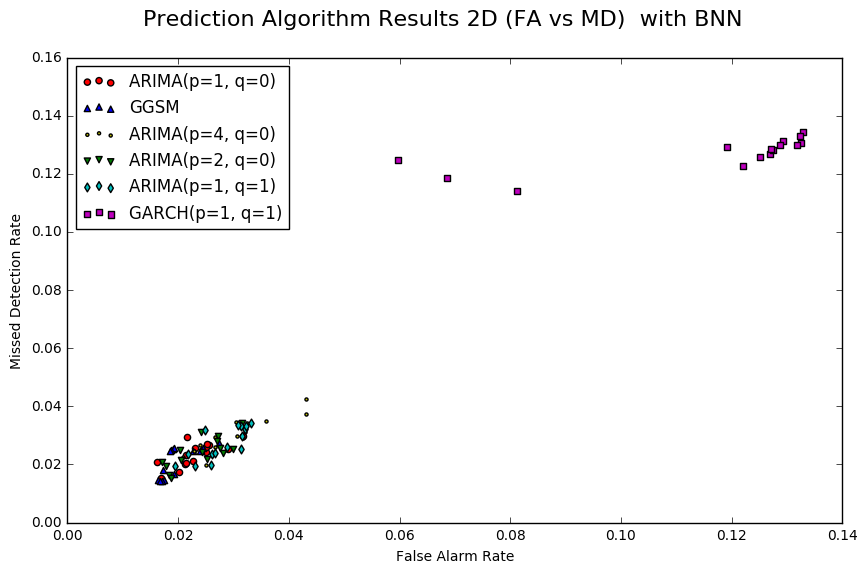

In [2]:
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Prediction Algorithm Results 2D (FA vs MD)  with BNN', fontsize=16)
ax = fig.add_subplot(111)
ax.set_xlabel('False Alarm Rate')
ax.set_ylabel('Missed Detection Rate')

colors_and_markers = [('r', 'o'), ('b', '^'), ('y', '.'), ('g', 'v'),
                      ('c', 'd'), ('m', 's'), ('k', 'p')]
count = 0

for algorithm, algorithm_result in algorithm_results.iteritems():
    x = [r[1] for r in algorithm_result]
    y = [r[2] for r in algorithm_result]
    c, m = colors_and_markers[count]
    count += 1
    ax.scatter(x, y, c=c, marker=m, label=algorithm)
    
plt.legend(loc='upper left')

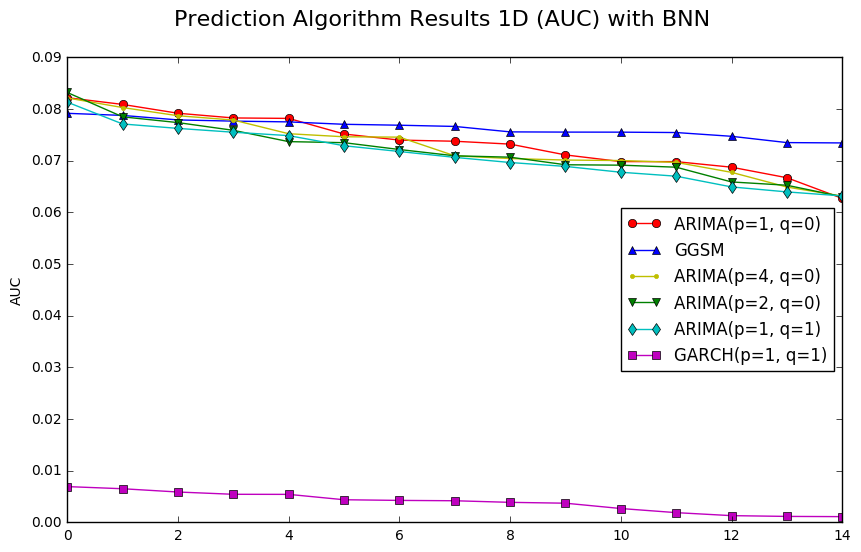

In [3]:
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Prediction Algorithm Results 1D (AUC) with BNN', fontsize=16)
ax = fig.add_subplot(111)
ax.set_ylabel('AUC')

colors_and_markers = [('r', 'o'), ('b', '^'), ('y', '.'), ('g', 'v'),
                      ('c', 'd'), ('m', 's'), ('k', 'p')]
count = 0

for algorithm, algorithm_result in algorithm_results.iteritems():
    x = [r[0] for r in algorithm_result]
    c, m = colors_and_markers[count]
    count += 1
    ax.plot(x, c=c, marker=m, label=algorithm)
    
plt.legend(loc='center right')

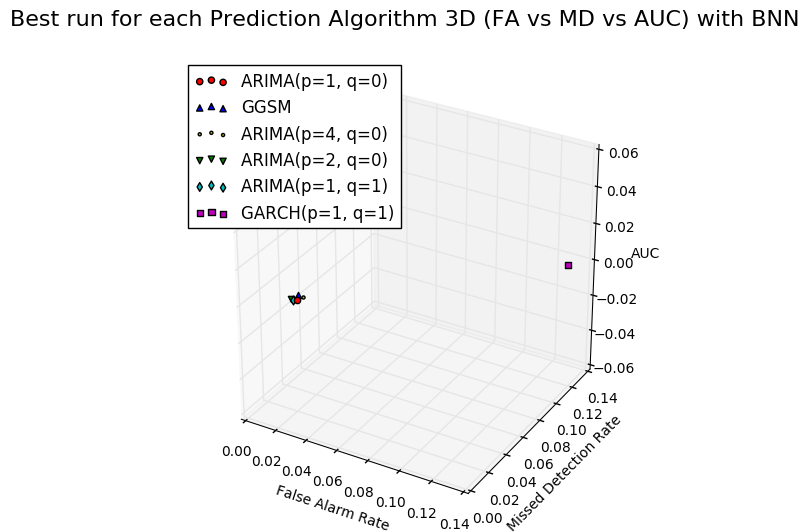

In [4]:
fig = plt.figure(figsize=(6, 6))
fig.suptitle('Best run for each Prediction Algorithm 3D (FA vs MD vs AUC) with BNN', fontsize=16)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('False Alarm Rate')
ax.set_ylabel('Missed Detection Rate')
ax.set_zlabel('AUC')

count = 0

for algorithm, algorithm_result in algorithm_results.iteritems():
    x = [algorithm_result[0][1]]
    y = [algorithm_result[0][2]]
    z = [algorithm_result[0][0]]
    c, m = colors_and_markers[count]
    count += 1
    ax.scatter(x, y, c=c, marker=m, label=algorithm)
    
plt.legend(loc='upper left')

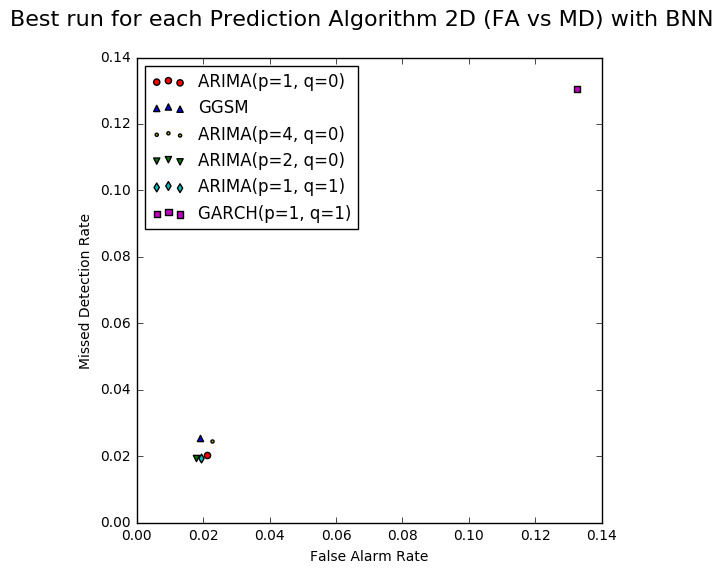

In [5]:
fig = plt.figure(figsize=(6, 6))
fig.suptitle('Best run for each Prediction Algorithm 2D (FA vs MD) with BNN', fontsize=16)
ax = fig.add_subplot(111)
ax.set_xlabel('False Alarm Rate')
ax.set_ylabel('Missed Detection Rate')

count = 0

for algorithm, algorithm_result in algorithm_results.iteritems():
    x = [algorithm_result[0][1]]
    y = [algorithm_result[0][2]]
    c, m = colors_and_markers[count]
    count += 1
    ax.scatter(x, y, c=c, marker=m, label=algorithm)
    
plt.legend(loc='upper left')

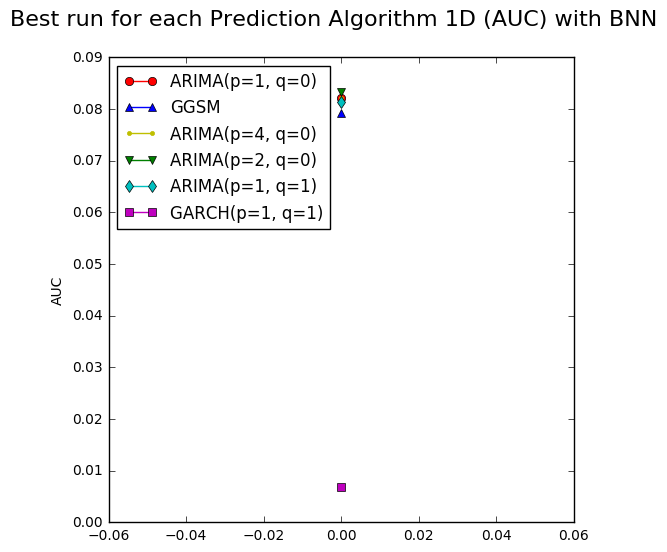

In [6]:
fig = plt.figure(figsize=(6, 6))
fig.suptitle('Best run for each Prediction Algorithm 1D (AUC) with BNN', fontsize=16)
ax = fig.add_subplot(111)
ax.set_ylabel('AUC')

count = 0

for algorithm, algorithm_result in algorithm_results.iteritems():
    x = [algorithm_result[0][0]]
    c, m = colors_and_markers[count]
    count += 1
    ax.plot(x, c=c, marker=m, label=algorithm)
    
plt.legend(loc='upper left')

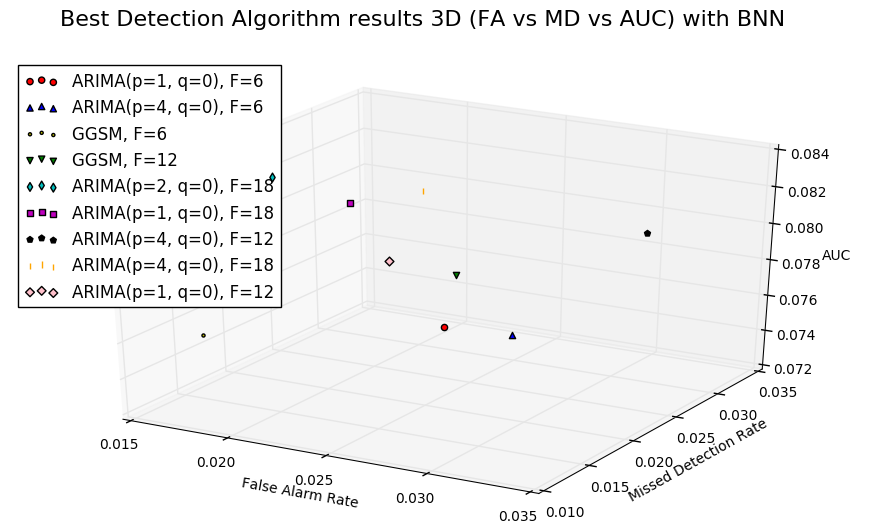

In [7]:
r = [
 'Model=ARIMA(p=2, q=0), ROC AUC=0.0832201398004, Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=3.075, FA=0.0177304964539, MD=0.0195035460993',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0822153882157, Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=3.125, FA=0.0211827007944, MD=0.0203000882613',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0821640907719, Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=3.075, FA=0.0228070175439, MD=0.0245614035088',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0803013759745, Past Prediction Horizon=48, Future Prediction Horizon=12, Threshold=3.225, FA=0.0318142734308, MD=0.0292347377472',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0791990366166, Past Prediction Horizon=48, Future Prediction Horizon=12, Threshold=3.175, FA=0.0227670753065, MD=0.0210157618214',
 'Model=GGSM, ROC AUC=0.0776766642933, Past Prediction Horizon=80, Future Prediction Horizon=12, Threshold=3.275, FA=0.0242152466368, MD=0.0251121076233',
 'Model=GGSM, ROC AUC=0.0755507077008, Past Prediction Horizon=80, Future Prediction Horizon=6, Threshold=3.375, FA=0.0163636363636, MD=0.0145454545455',
 'Model=ARIMA(p=4, q=0), ROC AUC=0.0745767266864, Past Prediction Horizon=48, Future Prediction Horizon=6, Threshold=3.325, FA=0.0267471958585, MD=0.0258843830889',
 'Model=ARIMA(p=1, q=0), ROC AUC=0.0732255367434, Past Prediction Horizon=48, Future Prediction Horizon=6, Threshold=3.375, FA=0.0216076058773, MD=0.0293863439931',
]
algorithm_results = dict()

for line in r:           
    toks = line.split(', ')

    if len(toks) == 7:
        algorithm = toks[0].replace('Model=', '')+ ', F=' + toks[3].split('=')[1]
    else:
        algorithm = toks[0].replace('Model=', '') + ', ' + toks[1] + ', F=' + toks[4].split('=')[1]
        
    if algorithm not in algorithm_results:
        algorithm_results[algorithm] = []
        

    if len(toks) == 7:
        algorithm_results[algorithm].append([float(toks[1].split('=')[1])] + map(lambda t: float(t.split('=')[1]), toks[5:]))
    else:
        algorithm_results[algorithm].append([float(toks[2].split('=')[1])] + map(lambda t: float(t.split('=')[1]), toks[6:]))

fig = plt.figure(figsize=(11, 6))
fig.suptitle('Best Detection Algorithm results 3D (FA vs MD vs AUC) with BNN', fontsize=16)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('False Alarm Rate')
ax.set_ylabel('Missed Detection Rate')
ax.set_zlabel('AUC')

colors_and_markers = [('r', 'o'), ('b', '^'), ('y', '.'), ('g', 'v'),
                      ('c', 'd'), ('m', 's'), ('k', 'p'), ('#FFA500', '|'), ('#FFC0CB', 'D')]
count = 0

for algorithm, algorithm_result in algorithm_results.iteritems():
    x = [r[1] for r in algorithm_result]
    y = [r[2] for r in algorithm_result]
    z = [r[0] for r in algorithm_result]
    c, m = colors_and_markers[count]
    count += 1
    ax.scatter(x, y, z, c=c, marker=m, label=algorithm)
    
plt.legend(loc='upper left')

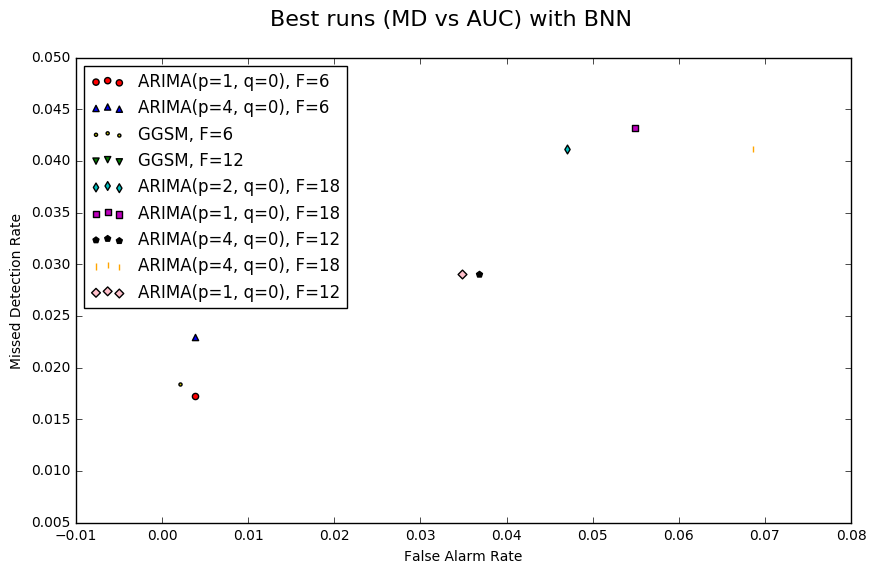

In [9]:
r = [
 'Model=GGSM, Past Prediction Horizon=80, Future Prediction Horizon=6, Threshold=3.375, FA=0.00204081632653, MD=0.0183673469388',
 'Model=ARIMA(p=1, q=0), Past Prediction Horizon=48, Future Prediction Horizon=6, Threshold=3.375, FA=0.00383141762452, MD=0.0172413793103',
 'Model=ARIMA(p=4, q=0), Past Prediction Horizon=48, Future Prediction Horizon=6, Threshold=3.325, FA=0.00383141762452, MD=0.0229885057471',
 'Model=GGSM, Past Prediction Horizon=80, Future Prediction Horizon=12, Threshold=3.275, FA=0.00413223140496, MD=0.0309917355372',
 'Model=ARIMA(p=1, q=0), Past Prediction Horizon=48, Future Prediction Horizon=12, Threshold=3.175, FA=0.0348837209302, MD=0.0290697674419',
 'Model=ARIMA(p=4, q=0), Past Prediction Horizon=48, Future Prediction Horizon=12, Threshold=3.225, FA=0.0368217054264, MD=0.0290697674419',
 'Model=ARIMA(p=2, q=0), Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=3.075, FA=0.0470588235294, MD=0.0411764705882',
 'Model=ARIMA(p=1, q=0), Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=3.125, FA=0.0549019607843, MD=0.043137254902',
 'Model=ARIMA(p=4, q=0), Past Prediction Horizon=48, Future Prediction Horizon=18, Threshold=3.075, FA=0.0686274509804, MD=0.0411764705882'
]
algorithm_results = dict()

for line in r:           
    toks = line.split(', ')

    if len(toks) == 6:
        algorithm = toks[0].replace('Model=', '')+ ', F=' + toks[2].split('=')[1]
    else:
        algorithm = toks[0].replace('Model=', '') + ', ' + toks[1] + ', F=' + toks[3].split('=')[1]
        
    if algorithm not in algorithm_results:
        algorithm_results[algorithm] = []
        
    if len(toks) == 6:
        algorithm_results[algorithm].append(map(lambda t: float(t.split('=')[1]), toks[4:]))
    else:
        algorithm_results[algorithm].append(map(lambda t: float(t.split('=')[1]), toks[5:]))

fig = plt.figure(figsize=(10, 6))
fig.suptitle('Best runs (MD vs AUC) with BNN', fontsize=16)
ax = fig.add_subplot(111)
ax.set_xlabel('False Alarm Rate')
ax.set_ylabel('Missed Detection Rate')

colors_and_markers = [('r', 'o'), ('b', '^'), ('y', '.'), ('g', 'v'),
                      ('c', 'd'), ('m', 's'), ('k', 'p'), ('#FFA500', '|'), ('#FFC0CB', 'D')]
count = 0
print 
for algorithm, algorithm_result in algorithm_results.iteritems():
    x = [r[0] for r in algorithm_result]
    y = [r[1] for r in algorithm_result]
    
    c, m = colors_and_markers[count]
    count += 1
    ax.scatter(x, y, c=c, marker=m, label=algorithm)
    
plt.legend(loc='upper left')